In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

## Loading the dataset

In [2]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [3]:
## Visualizing what a hand written Digit would look like



	 	 Original value= 5


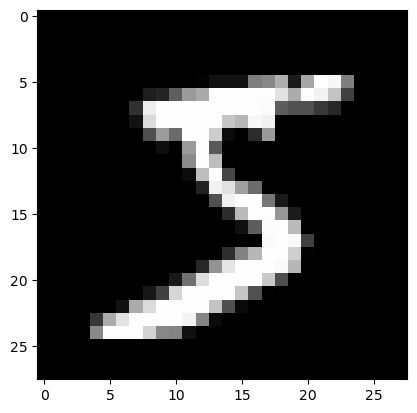

In [4]:
plt.imshow(X_train[0],cmap='gray')
print('\n')
print('\t \t','Original value=',y_train[0])

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
set(y_train)  # unique possible outcomes

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
K=len(set(y_train))  #K->total possible outcomes

In [11]:
X_train[0].shape

(28, 28)

## We will standardize the data by dividing by 255 as an image can be stored using a byte->8bits so all the possible outcomes would be 2^8=256 ranging from 0 to 255

In [12]:
X_train,X_test=X_train/255,X_test/255 

## Using a Functional API to build the model in which 2D image would be converted using flatten so as to fit it to Dense layer

In [13]:
i=Input(shape=X_train[0].shape)
x=Flatten()(i)
x=Dense(128,activation='relu')(x)
x=Dense(K,activation='softmax')(x)
model=Model(i,x)

## Compiling and fitting the model

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2564 - accuracy: 0.9276 - val_loss: 0.1492 - val_accuracy: 0.9564
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1132 - accuracy: 0.9670 - val_loss: 0.0985 - val_accuracy: 0.9700
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0785 - accuracy: 0.9766 - val_loss: 0.0823 - val_accuracy: 0.9752
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0582 - accuracy: 0.9818 - val_loss: 0.0745 - val_accuracy: 0.9774
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 0.0743 - val_accuracy: 0.9755
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0728 - val_accuracy: 0.9777
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.0827 - val_accuracy:

## Plotting the loss and accuracy 

<Axes: >

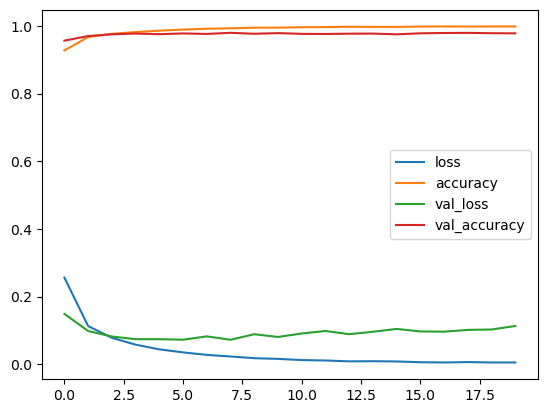

In [16]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [17]:
predictions=model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


## Creating the Confusion matrix 

Text(50.722222222222214, 0.5, 'original value')

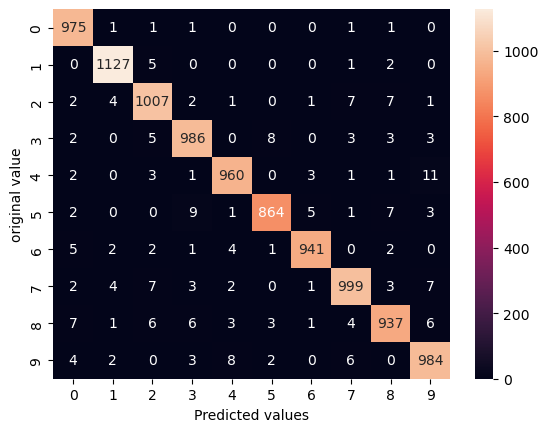

In [18]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=predictions)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('original value')

## Plotting the misclassified digits

	 predicted: 0 ,true label: 4


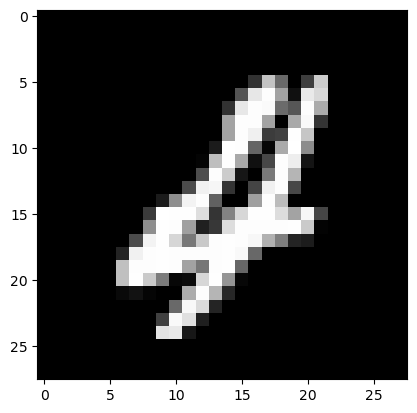

In [19]:
misclassified_idx=np.where(predictions!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
print('\t','predicted: %s ,true label: %s' % (predictions[i],y_test[i]))